In [1]:
!pip3 install seaborn

In [2]:
# Importing primary libraries. 
# Some libraries that are not used multiple times like pickle, are imported as and when they are used

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix,classification_report
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....


# PART A

## Q1

### A) Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [3]:
df_telecom_customer_churn_1 = pd.read_csv("TelcomCustomer-Churn_1.csv")

In [4]:
df_telecom_customer_churn_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


### B) Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [5]:
df_telecom_customer_churn_2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [6]:
df_telecom_customer_churn_2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### C) Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [7]:
df_telecom_merge = df_telecom_customer_churn_1.merge(df_telecom_customer_churn_2, on = 'customerID')

In [8]:
df_telecom_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### D) Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [9]:
num_columns_df_telecom_customer_churn_1 = len(df_telecom_customer_churn_1.columns)
num_rows_df_telecom_customer_churn_1 = len(df_telecom_customer_churn_1)

num_columns_df_telecom_customer_churn_2 = len(df_telecom_customer_churn_2.columns)
num_rows_df_telecom_customer_churn_2 = len(df_telecom_customer_churn_2)

num_columns_df_telecom_merge = len(df_telecom_merge.columns)
num_rows_df_telecom_merge = df_telecom_merge.shape[0]

In [10]:
if num_columns_df_telecom_merge == num_columns_df_telecom_customer_churn_1 + num_columns_df_telecom_customer_churn_2-1:
    print("Columns verified successfully")
else:
    print("Merge didn't happen correctly on columns:")

Columns verified successfully


In [11]:
# Printing Rows and Columns of all the dataframes

print("No. of columns in df_telecom_customer_churn_1 = " + str(num_columns_df_telecom_customer_churn_1))
print("No. of rows in df_telecom_customer_churn_1 = " + str(num_rows_df_telecom_customer_churn_1))
print("No. of columns in df_telecom_customer_churn_2 = " + str(num_columns_df_telecom_customer_churn_2))
print("No. of rows in df_telecom_customer_churn_2 = " + str(num_rows_df_telecom_customer_churn_2))
print("No. of columns in df_telecom_merge = " + str(num_columns_df_telecom_merge))
print("No. of rows in df_telecom_merge = " + str(num_rows_df_telecom_merge))

No. of columns in df_telecom_customer_churn_1 = 10
No. of rows in df_telecom_customer_churn_1 = 7043
No. of columns in df_telecom_customer_churn_2 = 12
No. of rows in df_telecom_customer_churn_2 = 7043
No. of columns in df_telecom_merge = 21
No. of rows in df_telecom_merge = 7043


## Q2

### A) Impute missing/unexpected values in the DataFrame

In [12]:
df_telecom_merge.isnull().mean().round(3).mul(100).sort_values(ascending=False)

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64

- Hence, there are no null values

In [13]:
# Printing first 10 rows in the dataframe

df_telecom_merge.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
df_telecom_merge.sample(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1388,9089-UOWJG,Female,0,Yes,Yes,12,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),58.35,740.55,No
2951,5815-HGGHV,Male,0,Yes,No,20,Yes,No,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Mailed check,64.15,1274.45,No
3683,7688-AWMDX,Male,0,Yes,No,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),54.50,3778.2,No
4057,7980-MHFLQ,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.90,1859.2,No
6435,0298-XACET,Male,0,Yes,Yes,52,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,50.20,2554,No
6232,9681-OXGVC,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,514,Yes
3246,8806-EAGWC,Male,0,No,No,3,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.15,159.15,Yes
6799,8071-SBTRN,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Mailed check,111.15,7737.55,No
693,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,Yes
3816,4304-XUMGI,Male,1,Yes,Yes,50,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Bank transfer (automatic),75.15,3822.45,No


In [15]:
df_telecom_merge['gender'].value_counts(dropna=False)

Male      3555
Female    3488
Name: gender, dtype: int64

In [16]:
df_telecom_merge['SeniorCitizen'].value_counts(dropna=False)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
df_telecom_merge['Partner'].value_counts(dropna=False)

No     3641
Yes    3402
Name: Partner, dtype: int64

In [18]:
df_telecom_merge['Dependents'].value_counts(dropna=False)

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [19]:
df_telecom_merge['tenure'].value_counts(dropna=False).sort_values(ascending=False)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [20]:
df_telecom_merge['PhoneService'].value_counts(dropna=False)

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [21]:
df_telecom_merge['MultipleLines'].value_counts(dropna=False)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [22]:
df_telecom_merge['OnlineBackup'].value_counts(dropna=False)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [23]:
df_telecom_merge['DeviceProtection'].value_counts(dropna=False)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [24]:
df_telecom_merge['TechSupport'].value_counts(dropna=False)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [25]:
df_telecom_merge['StreamingTV'].value_counts(dropna=False)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [26]:
df_telecom_merge['StreamingMovies'].value_counts(dropna=False)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [27]:
df_telecom_merge['Contract'].value_counts(dropna=False)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [28]:
df_telecom_merge['PaperlessBilling'].value_counts(dropna=False)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [29]:
df_telecom_merge['PaymentMethod'].value_counts(dropna=False)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [30]:
df_telecom_merge['MonthlyCharges'].value_counts(dropna=False)

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [31]:
df_telecom_merge['TotalCharges'].value_counts(dropna=False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [32]:
df_telecom_merge['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

- As observed there is no missing data or irrelevant data. Hence, we don't need to perform any changes.

### B) Make sure all the variables with continuous values are of ‘Float’ type

In [33]:
df_telecom_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- From the above columns, only `MonthlyCharges` and `TotalCharges` are continuous. `MonthlyCharges` is already as flatType, we need to convert `TotalCharges` into float

In [34]:
try:
    df_telecom_merge["TotalCharges"] = pd.to_numeric(df_telecom_merge["TotalCharges"])
except:
    print(Exception)


<class 'Exception'>


- On checking the column, turns out there are some values in this column which contain spaces and that's why we need to eliminate those and then convert into float

In [35]:
df_telecom_merge[df_telecom_merge["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- Hence, let's drop these 11 rows which have Total Charges as empty

In [36]:
df_telecom_merge = df_telecom_merge.drop(df_telecom_merge[df_telecom_merge['TotalCharges'] == " "].index)

In [37]:
df_telecom_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [38]:
# Converting TotalCharges into Float
df_telecom_merge["TotalCharges"] = pd.to_numeric(df_telecom_merge["TotalCharges"])
print(df_telecom_merge.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


### C) Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

In [39]:
df_telecom_merge.dtypes.info

<bound method Series.info of customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object>

In [40]:
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    df_telecom_merge[col] = df_telecom_merge[col].astype('category')

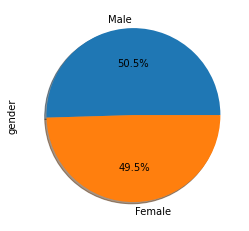

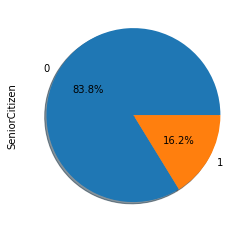

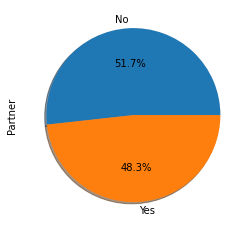

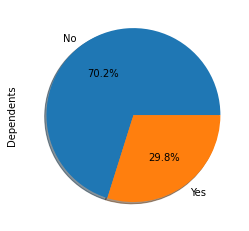

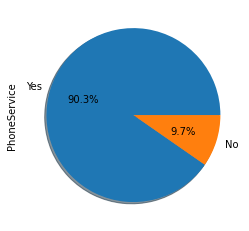

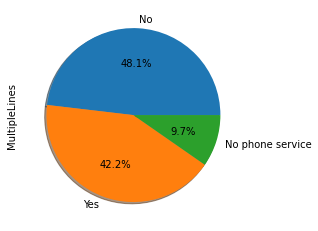

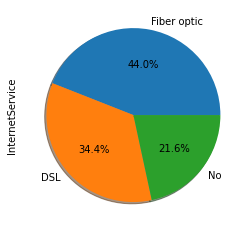

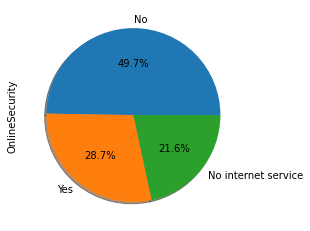

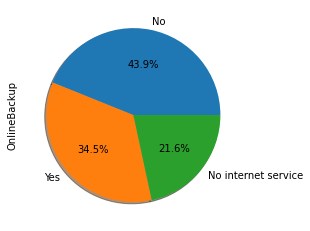

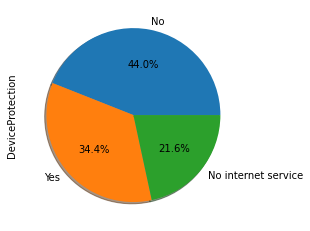

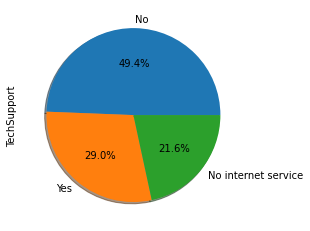

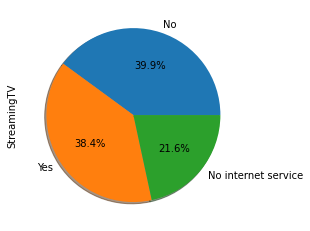

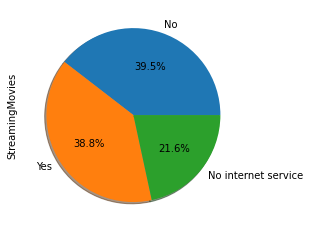

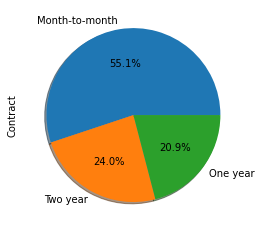

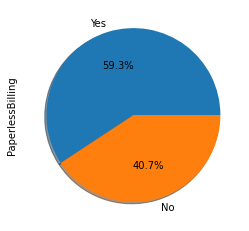

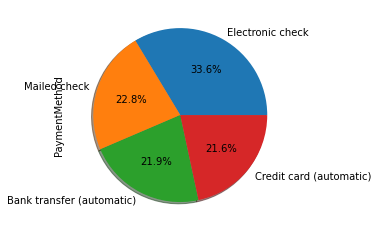

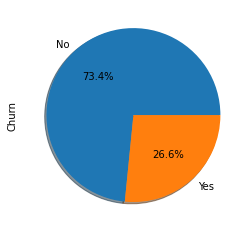

In [41]:
palette_color = sns.color_palette('bright')

def printPie(column_name):
    df_telecom_merge[column_name].value_counts().plot(kind='pie', subplots=True, autopct='%1.1f%%',startangle=0, shadow=True)
    plt.show()

col = list(df_telecom_merge)

for i in col:
    if (df_telecom_merge[i].dtype == 'category'):
        printPie(i)

### D) Share insights for Q2.c

1. The dataset contains 73.4% customers who have churned and 26.6% who have not churned
2. Ratio of male to female customers is almost similar, with male being 50.5% and Female as 49.5%
3. More than 90% of the customers are availilng phone service
4. 44% of the customers are using Fiber optic for internet connection, and 21.6% are not using internet service. Remaining customers are availing DSL.
5. Out of the 4 payment methods used, none of them is used extensively in larger quantity than the other 3. Regardless, Electronic check is used most (33.6%) followed by Mailed Check (22.8%), Bank Transfer (21.9%) and Credit Card (21.6%).
6. Month-to-Month is the preferred mode of contract period (55.1%). Two year & One year share almost similar distribution with 24% & 21.9% respectively

### E) Encode all the appropriate Categorical features with the best suitable approach

In [42]:
df_telecom_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [43]:
cat_dict = {
            'No':0, 'Yes' :1, 
            'Male':0, 'Female':1, 
            'Electronic check':1, 'Mailed check' :2, 'Bank transfer (automatic)' :3, 'Credit card (automatic)' :4, 
            'Month-to-month' :0, 'One year':1, 'Two year':2, 
            'No internet service':2, 'No phone service':2,
            'Fiber optic':1, 'DSL' :2
           }

In [44]:
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    df_telecom_merge[col] = df_telecom_merge[col].map(cat_dict)

df_telecom_merge.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,2,0,...,0,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,2,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,2,1,...,0,0,0,0,0,1,2,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,3,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,1,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,1,1,0,...,1,0,1,1,0,1,1,99.65,820.50,1
6,1452-KIOVK,0,0,0,1,22,1,1,1,0,...,0,0,1,0,0,1,4,89.10,1949.40,0
7,6713-OKOMC,1,0,0,0,10,0,2,2,1,...,0,0,0,0,0,0,2,29.75,301.90,0
8,7892-POOKP,1,0,1,0,28,1,1,1,0,...,1,1,1,1,0,1,1,104.80,3046.05,1
9,6388-TABGU,0,0,0,1,62,1,0,2,1,...,0,0,0,0,1,0,3,56.15,3487.95,0


In [45]:
df_telecom_merge.isnull().mean().round(3).mul(100).sort_values(ascending=False)

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64

### F) Split the data into 80% train and 20% test

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(df_telecom_merge.drop(['Churn', 'customerID'],axis=1), df_telecom_merge['Churn'], test_size=.20,
                                                   random_state=22)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

### G) Normalize/Standardize the data with the best suitable approach

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5625.0,4.989589e-17,1.000089,-0.987105,-0.987105,-0.987105,1.013063,1.013063
SeniorCitizen,5625.0,-1.389506e-17,1.000089,-0.443631,-0.443631,-0.443631,-0.443631,2.254125
Partner,5625.0,-6.631732e-17,1.000089,-0.965570,-0.965570,-0.965570,1.035658,1.035658
Dependents,5625.0,-1.007392e-16,1.000089,-0.652299,-0.652299,-0.652299,1.533039,1.533039
tenure,5625.0,8.842310e-17,1.000089,-1.280277,-0.954079,-0.138583,0.921560,1.614731
PhoneService,5625.0,1.117921e-16,1.000089,-3.090869,0.323534,0.323534,0.323534,0.323534
MultipleLines,5625.0,3.663243e-17,1.000089,-0.932032,-0.932032,0.597338,0.597338,2.126709
InternetService,5625.0,-9.726541e-17,1.000089,-1.535379,-0.174013,-0.174013,1.187354,1.187354
OnlineSecurity,5625.0,-6.315935e-17,1.000089,-0.896190,-0.896190,-0.896190,0.360934,1.618058
OnlineBackup,5625.0,3.347446e-17,1.000089,-0.996189,-0.996189,0.291394,0.291394,1.578978


## Q3

### A) Train a model using XGBoost. Also print best performing parameters along with train and test performance

In [48]:
!pip3 install xgboost

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier()

In [51]:
# Print default setting
xgb.get_params()

#Train Model 
xgboost = XGBClassifier(seed=0, tree_method="hist", enable_categorical=True).fit(X_train_transformed,y_train)
# Make prediction
xgboost_predict = xgboost.predict(X_test_transformed)

In [52]:
# Get performance metrics
precision, recall, fscore, support = score(y_test, xgboost_predict)
# Print result
print(f'The recall value for the baseline xgboost model is {recall[1]:.4f}')
print(f'Accuracy Score of the model :{accuracy_score(y_test, xgboost_predict):4f}')
print("\n\t\t\tClassification Report ")
print(classification_report(y_test, xgboost_predict))

The recall value for the baseline xgboost model is 0.4707
Accuracy Score of the model :0.769723

			Classification Report 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1031
           1       0.59      0.47      0.52       376

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



### B) Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance

In [53]:
!pip3 install hyperopt

In [54]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [55]:
X_train, X_test, y_train, y_test =train_test_split(df_telecom_merge.drop(['Churn', 'customerID'],axis=1), df_telecom_merge['Churn'], test_size=.20,
                                                   random_state=22, stratify = df_telecom_merge['Churn'])
X_train.shape,X_test.shape, y_train.shape, y_test.shape


sc = StandardScaler()

X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5625.0,-4.421155e-17,1.000089,-0.987105,-0.987105,-0.987105,1.013063,1.013063
SeniorCitizen,5625.0,-1.263187e-17,1.000089,-0.440182,-0.440182,-0.440182,-0.440182,2.271785
Partner,5625.0,-3.915880e-17,1.000089,-0.961111,-0.961111,-0.961111,1.040462,1.040462
Dependents,5625.0,5.747501e-17,1.000089,-0.648701,-0.648701,-0.648701,1.541542,1.541542
tenure,5625.0,-1.338978e-16,1.000089,-1.281409,-0.956279,-0.143454,0.913217,1.604118
PhoneService,5625.0,1.389506e-17,1.000089,-3.022439,0.330859,0.330859,0.330859,0.330859
MultipleLines,5625.0,4.294836e-17,1.000089,-0.937072,-0.937072,0.581519,0.581519,2.100111
InternetService,5625.0,-1.768462e-17,1.000089,-1.535832,-0.173849,-0.173849,1.188133,1.188133
OnlineSecurity,5625.0,5.589603e-17,1.000089,-0.896996,-0.896996,-0.896996,0.360632,1.618259
OnlineBackup,5625.0,6.315935e-18,1.000089,-0.994011,-0.994011,0.293123,0.293123,1.580258


#### Using GridSearch

In [56]:
# Define the search space
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)


In [57]:
# Define grid search
grid_search = GridSearchCV(estimator=xgboost, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train_transformed, y_train)
# Print grid search summary
grid_result


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.8],
                         'reg_alpha': [0, 0.5, 1, 5],
                         'reg_lambda': [0, 0.5, 1, 5]},
             refit='recall', scoring=['recall'])

In [58]:
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')


The best score is 0.5218
The best score standard deviation is 0.0154
The best hyperparameters are {'colsample_bytree': 0.5, 'reg_alpha': 0, 'reg_lambda': 5}


In [59]:
# Make prediction using the best model
grid_predict = grid_search.predict(X_test_transformed)
# Get predicted probabilities
# grid_predict_prob = grid_search.predict_proba(X_test_transformed)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, grid_predict)
# Print result
print(f'The recall value for the xgboost grid search is {recall[1]:.4f}')
print(f'The precision value for the xgboost grid search is {precision[1]:.4f}')

The recall value for the xgboost grid search is 0.4920
The precision value for the xgboost grid search is 0.6715


#### Using RandomSearch

In [60]:
# Define the search space
param_grid = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": range(3,21,3),
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,5)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [61]:
# Define random search
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_train_transformed, y_train)
# Print grid search summary
random_result

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=48, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   refit='recall', scoring=['recall'])

In [62]:
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_result.best_score_:.4f}')
print('The best score standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
print(f'The best hyperparameters are {random_result.best_params_}')


The best score is 0.5304
The best score standard deviation is 0.0004
The best hyperparameters are {'reg_lambda': 1, 'reg_alpha': 10, 'max_depth': 9, 'learning_rate': 1, 'gamma': 0.0, 'colsample_bytree': 0.5}


In [63]:
# Make prediction using the best model
random_predict = random_search.predict(X_test_transformed)
# Get predicted probabilities
# random_predict_prob = random_search.predict_proba(X_test_transformed)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, random_predict)
# Print result
print(f'The recall value for the xgboost random search is {recall[1]:.4f}')
print(f'The precision value for the xgboost random search is {precision[1]:.4f}')



The recall value for the xgboost random search is 0.4947
The precision value for the xgboost random search is 0.6679


#### Bayesian Optimization For XGBoost

In [64]:
# Space
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}


In [65]:
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)


In [66]:
# Objective function
def objective(params):
    
    xgboost = XGBClassifier(seed=0, **params)
    score = cross_val_score(estimator=xgboost, 
                            X=X_train_transformed, 
                            y=y_train, 
                            cv=kfold, 
                            scoring='recall', 
                            n_jobs=-1).mean()
    # Loss is negative score
    loss = - score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}


In [67]:
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = Trials())

100%|██████████| 48/48 [01:36<00:00,  2.01s/trial, best loss: -0.5217503279651673]


In [68]:
# Print the index of the best parameters
print(best)
# Print the values of the best parameters
print(space_eval(space, best))


{'colsample_bytree': 6, 'gamma': 4, 'learning_rate': 3, 'max_depth': 1, 'reg_alpha': 3, 'reg_lambda': 1}
{'colsample_bytree': 0.9, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 6, 'reg_alpha': 1, 'reg_lambda': 0.01}


In [69]:
# Train model using the best parameters
xgboost_bo = XGBClassifier(seed=0, 
                           colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X_train_transformed,y_train)
# Make prediction using the best model
bayesian_opt_predict = xgboost_bo.predict(X_test_transformed)
# # Get predicted probabilities
# bayesian_opt_predict_prob = xgboost_bo.predict_proba(X_test_transformed)[:,1]

# Get performance metrics for testing data 
precision, recall, fscore, support = score(y_test, bayesian_opt_predict)
# Print result
print(f'The recall value for the xgboost Bayesian optimization is {recall[1]:.4f}')
print(f'The precision value for the xgboost Bayesian optimization is {precision[1]:.4f}')

The recall value for the xgboost Bayesian optimization is 0.5107
The precision value for the xgboost Bayesian optimization is 0.6871


### Summary

1. We tried 3 methods for hyperparameter tuning and optimisation : grid search, random search, and Bayesian optimization
2. The precision scores for each of the models are: 0.6715 for grid search, 0.6679 for random search & 0.6871 for Bayesian optimization. Hence, we got the best precision from the Bayesian optimization.
3. The recall scores for each of the models are: 0.4920 for grid search, 0.4947 for random search & 0.5107 for Bayesian optimization. Hence, we got the best recall from the random Bayesian optimization.
4. For Churn Prediction, we use recall as a better metric. Hence, Bayesian optimization gives the best recall.
5. The best Parameters are : {'colsample_bytree': 0.9, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 6, 'reg_alpha': 1, 'reg_lambda': 0.01}

# PART B

In [70]:
# Creating a ML Workflow function, which takes in file_path and file_format as input, 
# and calls the required preprocessing method, building model, saving and loading the model.
def ML_workflow(file_path, file_format):
    
    # Reading the csv/json file
    df = read_file(file_path, file_format)
    
    # PreProcessing the Data
    df_preprocessed = preprocessing(df)
    
    # Building model
    model = model_building(df_preprocessed)
    
    # Saving the model
    filename = 'model.pkl'
    model_save(model, filename)
    
    # Load Saved model
    load_saved_model(filename)

In [71]:
# Reads the file and convert into a pandas dataframe

def read_file(file_path, file_format):
    if (file_format == "csv"):
        df = pd.read_csv(file_path)
    elif (file_format == "json"):
        df = pd.read_json(file_path)
    else:
        print("unsupported file format")
    
    return df

In [72]:
# This is the preprocessing function which does all the preprocessing of dataframe by calling the separate functions.
def preprocessing(df):
    
    # Removing cells which have whitespaces
    remove_whitespace_records(df)
    
    # Updating DataType Columns
    update_datatypes_column(df)
    
    # Checking for Null Values and Removing/Imputing those
    check_null_and_impute(df)
    
    # Dropping Duplicate Rows
    drop_duplicates(df)

    return df

In [73]:
# This function calls the individual model to train and predict, and is the main method to build the model.
# We are training & Comparing 3 models, i.e., LogisticRegression, KNN, and XGBClassifier to train and predict.

def model_building(df):
    # Splitting the Data
    X_train, X_test, y_train, y_test = data_split(df)
        
    # Standardising the Data
    X_train_transformed = standardising(df)
    
    # Building logistic Regression Model
    score_lr, model_lr = model_logistic(X_train_transformed, y_train, X_test, y_test)
    # Building Xgboost Model
    score_xgb, model_xgb = model_xgboost(X_train_transformed, y_train, X_test, y_test)
    # Building KNN Model
    score_knn, model_kn = model_knn(X_train_transformed, y_train, X_test, y_test)
    
    print("Score for KNN Model = " + str(score_knn))
    print("Score for Logistic Regression = " + str(score_lr))
    print("Score for XGB Classifier = " + str(score_xgb))
    
    model_dict = {model_kn:score_knn, model_xgb:score_xgb, model_lr:score_lr}
    # Comparing the model with the best score, and returning it.
    Keymax = max(zip(model_dict.values(), model_dict.keys()))[1]
    
    return Keymax

In [74]:
# Checks for null values and impute them according to their datatype
from pandas.api.types import is_numeric_dtype

def check_null_and_impute(df):
    
    # Numeric
    for i in df.columns:
        if(is_numeric_dtype(df[i])):
            df[i].fillna(df[i].mean())
    
    # Categorical
    df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
    
    return df

In [75]:
# This method removes any whitesepaces present in any of the cells. 
# Basically, if the cell is not a null type, but is empty or only contain spaces.
def remove_whitespace_records(df):
    for i in df.columns:
        df[i].drop(df[df[i] == " "].index, inplace=True)
    return df

In [76]:
# This is used to update the datatypes of columns to float or categorical if required.
def update_datatypes_column(df):
    for i in df.columns:
        df[i].apply(test_numeric)
    
    for i in df.columns:
        if ((len(pd.unique(df[i])) < 10) & (df[i].dtype == 'object')):
            df[i] = pd.Categorical(df[i])

    # print(df.info())
    return df

In [77]:
# This checks if the column has numeric data and converts into float type
def test_numeric(x):
    try:
        float(x)
        return True
    except Exception:
        return False


In [78]:
# This function drops any duplicate data in the dataframe
def drop_duplicates(df):
    if df.duplicated().sum!=0:
        df.drop_duplicates(inplace=True)
    else:
        print("No duplicated entries found in the dataset")
    
    return df

In [79]:
# This method splits the data into training and testing data along the 
# X (independent features), and Y(Target dependent feature)

def data_split(df):
    X_train, X_test, y_train, y_test =train_test_split(df_telecom_merge.drop(['Churn', 'customerID'],axis=1), df_telecom_merge['Churn'], test_size=.20,
                                                   random_state=22)
    # print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [80]:
# This function is used to normalise/standardise the values in the dataframe

def standardising(df):
    sc = StandardScaler()
    X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
    X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
    # print(X_train_transformed.describe().T)
    
    return X_train_transformed

In [81]:
# This method builds the KNN Classifier and fits, predicts, and returns score, model as the output.
from sklearn.neighbors import KNeighborsClassifier

def model_knn(X_train_transformed, y_train, X_test, y_test):
    NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
    NNH.fit(X_train_transformed, y_train)
    predicted_labels = NNH.predict(X_test)
    return NNH.score(X_test, y_test), NNH

In [82]:
# This method builds the LogisticRegression and fits, predicts, and returns score, model as the output.

from sklearn.linear_model import LogisticRegression

def model_logistic(X_train_transformed, y_train, X_test, y_test):
    model = LogisticRegression(solver="liblinear")
    model.fit(X_train_transformed, y_train)
    #predict on test
    y_predict = model.predict(X_test)
    model_score = model.score(X_test, y_test)
    return model_score, model


In [83]:
# This method builds the XGBoost Regressor/Classifier and fits, predicts, and returns score, model as the output.

def model_xgboost(X_train_transformed, y_train, X_test, y_test):
    xgb.get_params()
        
    param_grid = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": range(3,21,3),
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,5)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
    
    # Set up score
    scoring = ['recall']
    
    # Set up the k-fold cross-validation
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    
    # Define random search
    random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
    # Fit grid search
    random_result = random_search.fit(X_train_transformed, y_train)
    
    # Print grid search summary
    print(random_result)
    
    # Print the best score and the corresponding hyperparameters
    print(f'The best score is {random_result.best_score_:.4f}')
    print(f'The best hyperparameters are {random_result.best_params_}')
    
    # Make prediction using the best model
    random_predict = random_search.predict(X_test_transformed)

    return accuracy_score(y_test, random_predict), random_search

In [84]:
# This method is used to save the model with best score as a picke file

import pickle
def model_save(model, final_model_filename):
    pickle.dump(model, open(final_model_filename, 'wb'))

In [85]:
# This method is used to load the model from the saved picke file

def load_saved_model(filename):
    loaded_model = pickle.load(open(filename, 'rb'))
    print("Model Loaded from File",{loaded_model})

In [86]:
# Defining main function calling the ML_workflow method
def main():
    ML_workflow("TelcomCustomer-Churn_2.csv","csv")

In [87]:
# Using the special variable
# __name__
# This is the main runner for all the functions, that we defined in PART B. 
# Running this code will start running, building the model, saving and loading it from pickle
if __name__=="__main__":
    main()

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=48, 

- Hence, for this particular csv data, best model is Logistic Regression with score of 75.55%

# THE END